In [1]:
import pandas as pd
df = pd.read_json(r"E:\Flip robo Internship\CLIENT 1\Cell_Phones_and_Accessories.json")

C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install gensim

In [4]:
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [5]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [6]:
df.dropna(subset=['Review','Rev_summ'], inplace=True)

In [7]:
df.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352259
Reviewer_Name           89
Review                   0
Rev_summ                 0
Review_timestamp         0
Useful              697443
Prod_img            741480
dtype: int64

we have dropped na values from Review and Rev_summ, no na values are present in that columna

droping the column which are having high null values along with the unnecessary columns

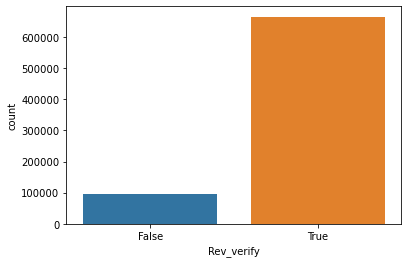

checking the count of the Verified and Unverified reviews
True     664660
False     94942
Name: Rev_verify, dtype: int64
checking the % of the Verified and Unverified reviews


True     87.501086
False    12.498914
Name: Rev_verify, dtype: float64

In [8]:
sns.countplot('Rev_verify',data=df)
plt.show()

print('checking the count of the Verified and Unverified reviews')
print(df.Rev_verify.value_counts())

print('checking the % of the Verified and Unverified reviews')
(df.Rev_verify.value_counts()/len(df.Rev_verify))*100

In [9]:
#average rating
average_ratings = round(df.groupby(['IC'])['Rating'].mean().reset_index(),2)

In [10]:
average_ratings.head()
average_ratings.shape

(48133, 2)

In [11]:
minimum_ratings = df.groupby(['IC'])['Rating'].min().reset_index()

In [12]:
minimum_ratings.head()
minimum_ratings.shape

(48133, 2)

In [13]:
maximum_ratings = df.groupby(['IC'])['Rating'].max().reset_index()

In [14]:
maximum_ratings.head()
maximum_ratings.shape

(48133, 2)

In [15]:
total_ratings = df.groupby(['IC'])['Rating'].count().reset_index()

In [16]:
total_ratings.head()
total_ratings.shape

(48133, 2)

In [17]:
#Getting the unique IC value
unique_ic = df['IC'].unique()

#Creating a data frame from ic values
df_ic = pd.DataFrame(data=unique_ic,columns=['IC'])

In [18]:
one_star_rating = round(df[df['Rating']==1].groupby(['IC'])['Rating'].count().reset_index())
two_star_rating = round(df[df['Rating']==2].groupby(['IC'])['Rating'].count().reset_index())
three_star_rating = round(df[df['Rating']==3].groupby(['IC'])['Rating'].count().reset_index())
four_star_rating = round(df[df['Rating']==4].groupby(['IC'])['Rating'].count().reset_index())
five_star_rating = round(df[df['Rating']==5].groupby(['IC'])['Rating'].count().reset_index())

In [19]:
df_indi_rating_count = df_ic.merge(one_star_rating,on='IC',how='left').merge(two_star_rating,how='left',on='IC').merge(three_star_rating,how='left',on='IC').merge(four_star_rating,how='left',on='IC').merge(five_star_rating,how='left',on='IC')

In [20]:
df_indi_rating_count.columns = ['IC','1 star ratings','2 star ratings','3 star ratings','4 star ratings','5 star ratings']

In [21]:
df_indi_rating_count = df_indi_rating_count.fillna(0)
df_indi_rating_count.isnull().sum()

IC                0
1 star ratings    0
2 star ratings    0
3 star ratings    0
4 star ratings    0
5 star ratings    0
dtype: int64

In [22]:
for col in df_indi_rating_count.select_dtypes(include=['float']).columns:
    df_indi_rating_count[col] = df_indi_rating_count[col].astype(int)

In [23]:
df_indi_rating_count.sample(10)

,IC,1 star ratings,2 star ratings,3 star ratings,4 star ratings,5 star ratings
7642,B00HFW4EI0,3,2,1,6,18
20397,B00LUACUR0,0,0,0,2,4
32236,B003NQ7RZY,0,0,0,1,3
6532,B00L7WGW7K,5,5,10,20,63
22702,B0161RM2WY,0,0,2,0,1
38124,B00GNH88FI,0,0,0,0,2
47352,B0183GJJY0,0,0,1,0,2
12731,B00TRB2CHW,0,0,2,2,5
4500,B00FH9B59O,0,0,0,1,4
37722,B00N2B7IM2,0,0,0,1,5


In [24]:
df_rating_set = [total_ratings, average_ratings, maximum_ratings, minimum_ratings,df_indi_rating_count]

In [25]:
df_rating_data = functools.reduce(lambda left,right: pd.merge(left,right,on='IC'), df_rating_set)

In [26]:
df_rating_data.columns=['IC','Total rating','Average rating','Maximum rating','Minimum rating','1 star ratings','2 star ratings','3 star ratings','4 star ratings','5 star ratings']

In [27]:
df_rating_data.shape

(48133, 10)

In [28]:
df_rating_data

,IC,Total rating,Average rating,Maximum rating,Minimum rating,1 star ratings,2 star ratings,3 star ratings,4 star ratings,5 star ratings
0,7508492919,40,4.30,5,1,1,1,4,13,21
1,7532385086,7,3.29,5,1,2,0,1,2,2
2,7887421268,13,3.54,5,1,3,1,1,2,6
3,8199900164,4,3.75,5,2,0,1,1,0,2
4,8288853439,11,3.82,5,1,2,1,0,2,6
...,...,...,...,...,...,...,...,...,...,...
48128,B01HJBS5C2,12,3.25,5,1,2,3,1,2,4
48129,B01HJC7N4C,5,4.60,5,3,0,0,1,0,4
48130,B01HJCN1UC,22,4.73,5,4,0,0,0,6,16
48131,B01HJCN55I,11,4.45,5,2,0,2,0,0,9


In [29]:
df_rating_data.to_csv('df_rating_data.csv',index_label=False)

In [30]:
# Rev_verify, Review_date, Prod_meta, Reviewer_Name, Review_timestamp, Useful and Prod_img and Review dropped
df_ext = df.loc[:,['IC','Rev_summ']]

In [31]:
df_ext.isnull().sum()

IC          0
Rev_summ    0
dtype: int64

In [32]:
df_ext["Rev Length"]= df_ext["Rev_summ"].str.len()

In [33]:
df_ext.sort_values("IC", inplace = True)

In [34]:
df_ext.shape

(759602, 3)

In [35]:
df_ext.drop_duplicates(inplace=True)

In [36]:
df_ext.shape

(608602, 3)

In [37]:
df_ext.nunique()

IC             48133
Rev_summ      366596
Rev Length       153
dtype: int64

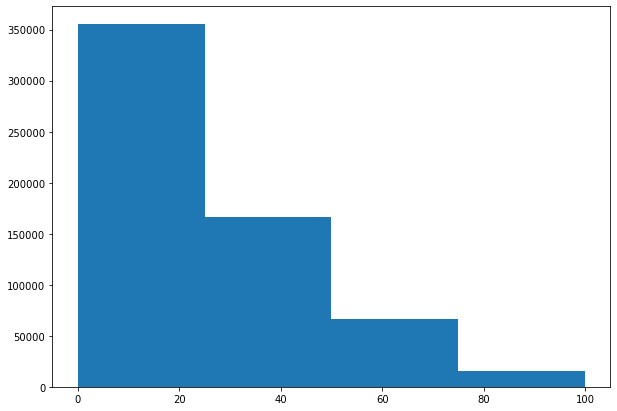

In [38]:
#plotting distribution
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_ext['Rev Length'], bins = [0, 25, 50, 75, 100]) 
plt.show()

In [39]:
df_merge = df_ext.groupby(['IC'])['Rev_summ'].apply('. '.join).reset_index()

In [40]:
df_merge.shape

(48133, 2)

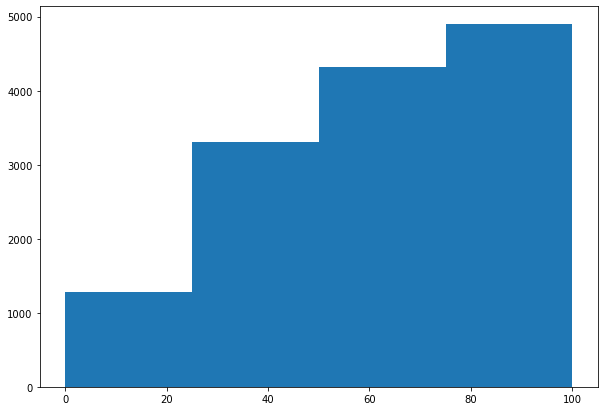

In [41]:
#plotting distribution of string 
df_merge["Rev Length"]= df_merge["Rev_summ"].str.len() 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df_merge['Rev Length'], bins = [0, 25, 50, 75, 100]) 
plt.show()

# Fetching summary & keywords

In [42]:
df_merge.rename(columns={"IC":'Product_name',"Rev_summ":'prod_des'},inplace=True)

In [43]:
data = df_merge

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
import spacy
!python -m spacy download en

C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)



  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=dc2c782f98dee9f2b46f47772640743784a22dca80d092750e5ca06cae4a84d2
  Stored in directory: C:\Users\RAJSHREE\AppData\Local\Temp\pip-ephem-wheel-cache-r0qx1ym8\wheels\b7\0d\f0\7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
symbolic link created for C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\spacy\data\en <<===>> C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\en_core_web_sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[+] Linking successful
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\en_core_web_sm -->
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [58]:
nlp = spacy.load("en")

In [59]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJSHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
def extract_noun(doc):
    return ([i for i in nlp(doc) if i.pos_=='NOUN'],[i for i in nlp(doc) if i.pos_=='PROPN'])

In [63]:
data['noun_keywords'] =  data['prod_des'].apply(extract_noun)

In [64]:
data.head()

,Product_name,prod_des,Rev Length,noun_keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,540,"([case, case, Bing, Bling, price, CASE, case, ..."
1,7532385086,A waste of money!. One Star. htc evo cover. No...,123,"([waste, money, product], [Star, evo, Stars])"
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,190,"([Stars, plastic, suede, deal, case, fit], [St..."
3,8199900164,item didn't work. Five Stars. I,31,"([item, Stars], [])"
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,140,"([BUY, Stars, Stars, charger, Stars, charger],..."


In [65]:
df_noun_out = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'keywords':data['noun_keywords']})

In [66]:
df_noun_out.sample(10)

,Product_name,prod_des,keywords
8413,B009TTSQPY,"Great Protector Sleeve, shipping took alittle ...","([shipping, alittle, Stars, price, Screen, fil..."
36705,B013TK7JCE,Love it. Five Stars. the case also offers a pr...,"([Stars, case, buffer, edge, phone, Protects, ..."
30985,B00UN9BYDU,Under-powered but works as advertised. Compact...,"([charger, flashtlight, gizmo, back, up, flash..."
43665,B01CLOZ7WI,Buyer beware.. awesome case. Five Stars. Very ...,"([case, Stars, case, case, glove, case, phone,..."
1908,B0042FZ9K0,Tabs slip off.... One Star. This is a good one...,"([Tabs, one, product, product, pain, feet, mou..."
12134,B00CYNN4ZO,not bad at all. Adequate. Unsatisfied. NOT you...,"([day, protection, spring, lifeproof, reason],..."
19468,B00JM0YV1I,Five Stars. Is is good for the price and does ...,"([Stars, price, phone, Stars], [Star])"
45562,B01EFEX6LG,"Works Well With Movies, But Haven't Been Able ...","([Movies, price, money, Stars], [Games, MEH])"
17407,B00HSWMXIK,Five Stars. Works great,"([Stars], [])"
26609,B00P0W6OLM,"Focus people, focus!. Five Stars. Nice kit, bu...","([people, Stars, kit, lens, image, distortion,..."


In [67]:
def tuple_to_list(t):
    l1,l2 = t
    l1.extend(l2)
    return [str(i) for i in l1] 

In [68]:
data['keywords'] = df_noun_out['keywords'].apply(tuple_to_list)

In [69]:
data['keywords']

0        [case, case, Bing, Bling, price, CASE, case, c...
1                [waste, money, product, Star, evo, Stars]
2        [Stars, plastic, suede, deal, case, fit, Star,...
3                                            [item, Stars]
4        [BUY, Stars, Stars, charger, Stars, charger, G...
                               ...                        
48128    [Charger, headphone, holes, case, holster, cas...
48129    [experience, VR, one, FUTURE, VR, headset, dev...
48130    [Stars, Stars, product, nylon, cord, cable, th...
48131                    [cable, cable, Stars, Stars, Buy]
48132           [crack, Stars, cover, folks, money, price]
Name: keywords, Length: 48133, dtype: object

In [70]:
df = [' '.join(i) for i in data['keywords']]

In [71]:
vectorizer1 = TfidfVectorizer(df,lowercase = True, analyzer='word', stop_words='english', min_df = 0.1,max_df = 0.9)
tfidfmat1 = vectorizer1.fit_transform(df)
print("TFIDF shape: ", tfidfmat1.shape)
print("Terms in TFIDF: ",vectorizer1.get_feature_names())
terms = vectorizer1.get_feature_names()

TFIDF shape:  (48133, 12)
Terms in TFIDF:  ['case', 'fit', 'great', 'iphone', 'phone', 'price', 'product', 'protection', 'quality', 'screen', 'star', 'stars']


In [72]:
def topn(tfidfmat,n):
    lst = []
    lst = [tfidfmat.todense()[i].argsort()[:,-n:] for i in range(tfidfmat.shape[0])]
    return lst

In [73]:
def get_topn_multi_keywords(tfidfmat,n,terms):
    topn_lst_indices = topn(tfidfmat,n)
    topn_lst_indices = np.array(topn_lst_indices).reshape((tfidfmat.shape[0],n))
    doc_keywords = [[terms[i] for i in l] for l in topn_lst_indices]
    return doc_keywords

In [74]:
doc_keywords = get_topn_multi_keywords(tfidfmat1,3,terms)
df_tfidf_out1 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'multi_keywords':doc_keywords})
df_tfidf_out1

,Product_name,prod_des,multi_keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,"[iphone, phone, case]"
1,7532385086,A waste of money!. One Star. htc evo cover. No...,"[stars, product, star]"
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,"[stars, star, fit]"
3,8199900164,item didn't work. Five Stars. I,"[screen, star, stars]"
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,"[screen, star, stars]"
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,"[stars, star, case]"
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...","[screen, star, stars]"
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,"[star, product, stars]"
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,"[screen, star, stars]"


In [75]:
def preprocessing(s):
    s = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',s)
    s = re.sub(r"http\S+",'', s)  
    d = nlp(s)
    lemmas = [token.lemma_ for token in d if not token.is_stop]
    return lemmas

In [76]:
pre_df = [preprocessing(i) for i in df]

In [77]:
pre_df[0]

['case',
 'case',
 'Bing',
 'Bling',
 'price',
 'CASE',
 'case',
 'case',
 'tightt',
 'plastic',
 'phone',
 'cover',
 'ADORABLE',
 'rest',
 'ble',
 'case',
 'case',
 'Great',
 'Gift',
 'Luv',
 'luv',
 'luv',
 'iPhone',
 '4s',
 'beautiful',
 'phone',
 'Stars',
 'GONNA',
 'bow',
 'sara',
 'Cute',
 'Crystal',
 'Bow']

In [78]:
docs = [' '.join(i) for i in pre_df]

In [79]:
vectorizer2 = TfidfVectorizer(docs,lowercase = True, min_df = 0.05,max_df = 0.95)
tfidfmat2 = vectorizer2.fit_transform(docs)
tfidfmat2.shape

(48133, 31)

In [80]:
vectorizer2.get_feature_names()[:5]

['battery', 'buy', 'case', 'charge', 'charger']

In [81]:
max_ind = [np.argmax(i) for i in tfidfmat2.todense()]
terms2 = vectorizer2.get_feature_names()
doc_keywords = [terms2[i] for i in max_ind]
df_tfidf_out2 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'keywords':doc_keywords})
df_tfidf_out2

,Product_name,prod_des,keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,case
1,7532385086,A waste of money!. One Star. htc evo cover. No...,money
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,protector
3,8199900164,item didn't work. Five Stars. I,item
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,charger
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,phone
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...",star
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,product
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,buy


In [84]:
doc_keywords = get_topn_multi_keywords(tfidfmat2,3,terms2)
df_tfidf_out2 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'multi_keywords':doc_keywords})
df_tfidf_out2

,Product_name,prod_des,multi_keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,"[cover, phone, case]"
1,7532385086,A waste of money!. One Star. htc evo cover. No...,"[product, star, money]"
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,"[star, fit, protector]"
3,8199900164,item didn't work. Five Stars. I,"[work, star, item]"
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,"[buy, stars, charger]"
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,"[charger, case, phone]"
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...","[job, work, star]"
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,"[star, stars, product]"
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,"[work, star, buy]"


In [85]:
vectorizer3 = TfidfVectorizer(docs,lowercase = True, min_df = 0.1,max_df = 0.9)
tfidfmat3 = vectorizer3.fit_transform(docs)
tfidfmat3.shape

(48133, 12)

In [86]:
max_ind = [np.argmax(i) for i in tfidfmat3.todense()]
terms3 = vectorizer3.get_feature_names()
doc_keywords = [terms3[i] for i in max_ind]
df_tfidf_out3 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'keywords':doc_keywords})
df_tfidf_out3

,Product_name,prod_des,keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,case
1,7532385086,A waste of money!. One Star. htc evo cover. No...,star
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,fit
3,8199900164,item didn't work. Five Stars. I,star
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,stars
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,phone
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...",star
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,product
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,star


In [87]:
doc_multi_keywords = get_topn_multi_keywords(tfidfmat3,3,terms3)
df_tfidf_out3 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'keywords':doc_multi_keywords})
df_tfidf_out3

,Product_name,prod_des,keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,"[iphone, phone, case]"
1,7532385086,A waste of money!. One Star. htc evo cover. No...,"[stars, product, star]"
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,"[case, star, fit]"
3,8199900164,item didn't work. Five Stars. I,"[screen, stars, star]"
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,"[screen, star, stars]"
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,"[stars, case, phone]"
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...","[screen, stars, star]"
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,"[star, stars, product]"
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,"[screen, stars, star]"


In [88]:
vectorizer4 = TfidfVectorizer(docs,lowercase = True, min_df = 0.05,max_df = 0.95,ngram_range=(1,2))
tfidfmat4 = vectorizer4.fit_transform(docs)
tfidfmat4.shape

(48133, 40)

In [89]:
terms4 =  vectorizer4.get_feature_names()
doc_multi_keywords4 = get_topn_multi_keywords(tfidfmat4,3,terms4)

In [90]:
terms4[:10]

['battery',
 'buy',
 'case',
 'case case',
 'case phone',
 'case star',
 'case stars',
 'charge',
 'charger',
 'color']

In [91]:
df_tfidf_multi_out4 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'multi_keywords':doc_multi_keywords4})
df_tfidf_multi_out4

,Product_name,prod_des,multi_keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,"[phone, case case, case]"
1,7532385086,A waste of money!. One Star. htc evo cover. No...,"[product, star, money]"
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,"[star, fit, protector]"
3,8199900164,item didn't work. Five Stars. I,"[color, star, item]"
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,"[buy, stars, charger]"
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,"[charger, case, phone]"
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...","[color, work, star]"
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,"[star, stars, product]"
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,"[work, star, buy]"


In [92]:
vectorizer5 = TfidfVectorizer(docs,lowercase = True, min_df = 0.02,max_df = 0.95,ngram_range=(1,2))
tfidfmat5 = vectorizer5.fit_transform(docs)
tfidfmat5.shape

(48133, 125)

In [93]:
terms5 =  vectorizer5.get_feature_names()
doc_multi_keywords5 = get_topn_multi_keywords(tfidfmat5,3,terms5)

In [94]:
df_tfidf_multi_out5 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'multi_keywords':doc_multi_keywords5})
df_tfidf_multi_out5

,Product_name,prod_des,multi_keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,"[gift, case case, case]"
1,7532385086,A waste of money!. One Star. htc evo cover. No...,"[money, product star, waste]"
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,"[deal, plastic, case fit]"
3,8199900164,item didn't work. Five Stars. I,"[year, star, item]"
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,"[buy, stars, charger]"
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,"[phone phone, piece, clip]"
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...","[year, star, device]"
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,"[star stars, cord, cable]"
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,"[buy, star star, cable]"


In [95]:
def get_tuned_keywords(docs,min_df,max_df,ngram_range,no_of_keywords):
    vectorizer5 = TfidfVectorizer(docs,lowercase = True, min_df =min_df,max_df = max_df,ngram_range=ngram_range)
    tfidfmat5 = vectorizer5.fit_transform(docs)
    print("Tfidf shape:",tfidfmat5.shape)
    terms5 =  vectorizer5.get_feature_names()
    print(terms5)
    doc_multi_keywords5 = get_topn_multi_keywords(tfidfmat5,no_of_keywords,terms5)
    df_tfidf_multi_out5 = pd.DataFrame(data = {'Product_name': data['Product_name'],'prod_des':data['prod_des'],'multi_keywords':doc_multi_keywords5})
    return(df_tfidf_multi_out5)

In [96]:
final_out_task1_df = get_tuned_keywords(docs,0.02,0.95,(1,3),7)
final_out_task1_df

Tfidf shape: (48133, 128)
['apple', 'awesome', 'battery', 'bit', 'brand', 'button', 'buy', 'cable', 'car', 'card', 'case', 'case case', 'case case case', 'case color', 'case fit', 'case iphone', 'case phone', 'case phone case', 'case price', 'case product', 'case protection', 'case quality', 'case star', 'case stars', 'cell', 'cell phone', 'charge', 'charger', 'clip', 'color', 'cord', 'cover', 'customer', 'customer service', 'day', 'deal', 'design', 'device', 'edge', 'excellent', 'feel', 'fit', 'galaxy', 'gift', 'glass', 'good', 'great', 'great case', 'great product', 'grip', 'hand', 'holder', 'idea', 'iphone', 'issue', 'item', 'job', 'junk', 'leather', 'lg', 'life', 'look', 'lot', 'love', 'material', 'money', 'month', 'nice', 'note', 'otterbox', 'perfect', 'phone', 'phone case', 'phone case case', 'phone phone', 'phone star', 'picture', 'piece', 'plastic', 'port', 'power', 'price', 'price case', 'price star', 'problem', 'product', 'product case', 'product price', 'product star', 'prot

,Product_name,prod_des,multi_keywords
0,7508492919,Cute. I can't stop using this case!. Bling cut...,"[phone, case case case, plastic, price case, g..."
1,7532385086,A waste of money!. One Star. htc evo cover. No...,"[edge, year, product, star, money, product sta..."
2,7887421268,Five Stars. plastic with suede. good deal. Thi...,"[star, fit, protector, star stars, deal, plast..."
3,8199900164,item didn't work. Five Stars. I,"[deal, day, customer service, good, year, star..."
4,8288853439,Galaxy S4 Charger. Works Great.... GOOD BUY. L...,"[feel, year, stars stars, galaxy, buy, stars, ..."
...,...,...,...
48128,B01HJBS5C2,(Hybrid Carbon Fiber) Charger and headphone ho...,"[case, month, phone, stars star, phone phone, ..."
48129,B01HJC7N4C,"My first experience with VR, and it's a very p...","[deal, day, customer service, cover, year, sta..."
48130,B01HJCN1UC,Four Stars. Five Stars. Durable and well made....,"[leather, star, stars, product, star stars, co..."
48131,B01HJCN55I,I really like the cable. Good cable. Worth.. G...,"[good, fit, year, star, buy, star star, cable]"


In [97]:
final_out_task1_df.to_csv('final_out_task1_df.csv',index=False)

In [98]:
i=48130
print("Original PDP:\n",data['prod_des'][i])
print("After POS:\n",docs[i])
print("Final Keywords:\n",final_out_task1_df['multi_keywords'][i])

Original PDP:
 Four Stars. Five Stars. Durable and well made. Decent!. Good product. Highly recommend!. but the nylon makes it less flexible than I would have liked.. It Works. It Really Works.. Pretty blue cord. Nice thick cable. thanks for a great cord.... very long cable cord. Keeps my electronics ready for action.. Best of the Best. The cable is perfect. It showed up as promised and is exactly .... Good cable great length.
After POS:
 star Stars product nylon cord cable thank cord cable cord electronics action cable cable length
Final Keywords:
 ['leather', 'star', 'stars', 'product', 'star stars', 'cord', 'cable']


In [99]:
i = 2222
print("Original PDP:\n",data['prod_des'][i]+"\n")
doc = nlp(data['prod_des'][i])
for chunk in doc.noun_chunks:
    print("ct:"+chunk.text+"\ncrt:"+ chunk.root.text+"\ncrd:"+ chunk.root.dep_+
            "\ncrh:"+chunk.root.head.text+"\n\n")

Original PDP:
 Not for 4s -- and also leaves gooey film after removal. This is a great screen protector. Bubble free?! I never thought I would see my phone without bubbles!. Best Screen Protector Out There

ct:4s
crt:4s
crd:pobj
crh:for


ct:gooey film
crt:film
crd:dobj
crh:leaves


ct:removal
crt:removal
crd:pobj
crh:after


ct:a great screen protector
crt:protector
crd:attr
crh:is


ct:Bubble
crt:Bubble
crd:nsubj
crh:free


ct:I
crt:I
crd:nsubj
crh:thought


ct:I
crt:I
crd:nsubj
crh:see


ct:my phone
crt:phone
crd:dobj
crh:see


ct:bubbles
crt:bubbles
crd:pobj
crh:without


ct:Best Screen Protector
crt:Protector
crd:ROOT
crh:Protector




In [100]:
chunk_text = [i.text.lower() for i in doc.noun_chunks]
chunk_root_text = [i.root.text.lower() for i in doc.noun_chunks]
print(chunk_text)
print(chunk_root_text)
l = chunk_text
lst_kw = final_out_task1_df['multi_keywords'][1]
print(lst_kw)

['4s', 'gooey film', 'removal', 'a great screen protector', 'bubble', 'i', 'i', 'my phone', 'bubbles', 'best screen protector']
['4s', 'film', 'removal', 'protector', 'bubble', 'i', 'i', 'phone', 'bubbles', 'protector']
['edge', 'year', 'product', 'star', 'money', 'product star', 'waste']


In [101]:
def match(lst_kw,lst_crt_ct):
    l = []
    for i in lst_kw:
        for j in lst_crt_ct:
            if i in j.split():
              #print(i,":",j)
              l.append(j)
    return list(set(l))

In [102]:
prod_des_lst = [i for i in final_out_task1_df['prod_des']]
def extract_ksp(col1,col2):
    lst_keywords = col1
    prod_des = col2
    doc = nlp(prod_des)
    lst_chunk_text = [i.text.lower() for i in doc.noun_chunks]
    lst_chunk_text.extend([i.root.text.lower() for i in doc.noun_chunks])
    return(match(lst_keywords,lst_chunk_text))

In [103]:
out = final_out_task1_df.apply(lambda x: extract_ksp(x.multi_keywords,x.prod_des),axis = 1)

In [104]:
df_ksp= pd.DataFrame(data = {'IC': data['Product_name'],'Rev_summ':data['prod_des'],'keywords':final_out_task1_df['multi_keywords'],'summary':out})
df_ksp.to_csv('final_out.csv',index=False)

In [105]:
df_ksp.to_csv('df_ksp.csv',index=False)

In [106]:
len(df_ksp)

48133

In [107]:
import random
n = np.random.randint(0, len(df_ksp), 1)
i =45793 # n[0]
print("Product_name\n",df_ksp['IC'][i])
print("Original PDP:\n",df_ksp['Rev_summ'][i])
print("After POS:\n",docs[i])
print("Apppropriate Keywords:\n",df_ksp['keywords'][i])
print("Summary:\n",df_ksp['summary'][i])

Product_name
 B01EMY6G2U
Original PDP:
 Works and doesnt damage the mask.. Fits my 1st generation Gear VR. Total false advertising..too small. Definitely a keeper
After POS:
 work mask generation advertising keeper Gear vr
Apppropriate Keywords:
 ['design', 'deal', 'day', 'customer service', 'great', 'year', 'work']
Summary:
 []


In [108]:
print(df_ksp.shape)
print(df_rating_data.shape)

(48133, 4)
(48133, 10)


In [109]:
df_final = df_ksp.merge(df_rating_data,on='IC',how='inner')

In [110]:
df_final.sample(10)

,IC,Rev_summ,keywords,summary,Total rating,Average rating,Maximum rating,Minimum rating,1 star ratings,2 star ratings,3 star ratings,4 star ratings,5 star ratings
7410,B0093VGQY6,"Good Basic Protection, Fits well. iPhone cover...","[iphone, protector, screen protector, fit, pro...","[case, the price, iphone, the screen protector...",46,3.76,5,1,1,7,9,14,15
32923,B00XBHEDBG,Five Stars. Great screen replacement. Perfect!...,"[life, price, battery, quality, replacement, p...","[quality, product, life, great screen replacem...",56,3.98,5,1,7,5,3,8,33
25249,B00NVDYB2G,Five Stars. Two Stars. Was able to successfull...,"[feel, year, stars stars, stars, good, power, ...","[five stars, two stars, the power button, butt...",7,4.43,5,2,0,1,0,1,5
35117,B010P5NZC4,"The quality of this product is very good, of c...","[work, value, deal, lot, card, quality product...","[sim card, deal, product, card, great deal, go...",25,4.72,5,3,0,0,2,3,20
37158,B014DSIUTW,Great Product. This Case Is So Cute.. Not an e...,"[gift, glass, product, case case, great, case,...","[case, product, this case, great product, not ...",3,4.67,5,4,0,0,0,1,2
2808,B004WKJ7YO,phone os perfect but the charger was terrible....,"[star, charger, battery, issue, life, phone ph...","[phone, this phone, the battery life, life, gr...",10,2.00,5,1,7,0,1,0,2
23544,B00MWI4JNM,Almost a Great Phone. Never missed my Samsung...,"[battery, star phone, hand, quality, price, ph...","[almost a great phone, great quality, good pho...",46,4.70,5,3,0,0,2,10,34
33259,B00XUBZIJ4,Overall Good. This is my full review of this c...,"[galaxy, gift, glass, excellent, year, case, r...","[case, review, my full review, this case]",2,3.50,5,2,0,1,0,0,1
42193,B01AOCXQMM,Five Stars. While the grip it gives my phone i...,"[star, case, quality, phone case, case phone, ...","[case, phone, quality, the clear case, the gri...",9,3.89,5,1,1,0,2,2,4
19684,B00JRGOKQ8,Great!. Works great. Five Stars. Four Stars. B...,"[phone phone, product, star, year, price, phon...","[phone, product, real 1 year review, a thick p...",66,4.27,5,1,2,5,7,11,41


In [111]:
df_final.to_json('Customer_review_summarization.json')